In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torch.nn.functional as F

In [6]:
SD = 0.3
Denom = SD**2*2
A = 1/np.sqrt(2*np.pi*SD)
print(Denom, A)

0.18 0.7283656203947194


In [7]:
torch.manual_seed(1)   
x = torch.unsqueeze(torch.linspace(-1, 1, 500), dim=1)  
z = x - 0.3
#Here is the Gaussian distribution defined!
y =  A*torch.exp(-z.pow(2)/Denom, out=None)  

y_rand_noise = y + 0.1*torch.rand(x.size())
# noisy y data (tensor), shape=(500, 1)

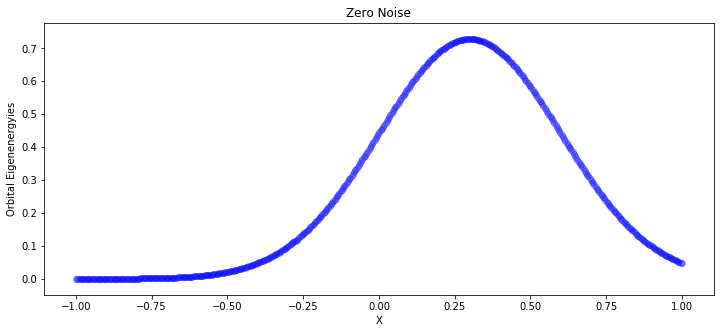

In [9]:
#Set variables 
from torch.autograd import Variable
x =Variable(x)
y = Variable(y)

plt.figure(figsize=(12,5))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "blue", alpha = 0.3)
plt.title('Zero Noise')
plt.xlabel('X')
plt.ylabel('Orbital Eigenenergyies')

 

plt.show()

In [10]:
class Net(nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   
        self.predict = torch.nn.Linear(n_hidden, n_output)   

    def forward(self, x):
        x = F.relu(self.hidden(x))      
        x = self.predict(x)             
        return x

In [12]:
net = Net(n_feature=1, n_hidden=10, n_output=1)

#We can experiment with Stochastic Gradient Descent or Adam depending on preference
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  #activation function for hidden layer

arr_loss = []
#This is going to be used for tallying the loss function's value at each epoch

In [13]:
def MAE(y,y_hat,epoch):
    res = 0
    for i in range(len(y)):
        res += abs(y[i] - y_hat[i])
    return res/len(y)

In [39]:
A = []
B = []
for a in range(0,5):
    for b in range(0,5):
        B.append(b)
A.append(B)
A[0][:5]

[0, 1, 2, 3, 4]

In [106]:
EPOCHS = 1000
y_pred = []
arr_pred = []
#99 output prediction sets from a single orbitals
for j in range(1,100):
    for i in range(1,EPOCHS+1):
          
        prediction = net(x)      

        loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

        optimizer.zero_grad()    
        loss.backward()          
        optimizer.step()        
    #arr_loss.append(loss.data.numpy())
    rand = torch.unsqueeze(torch.linspace(-1, 1, 500), dim=1)
    y_pred.append(prediction.data)
arr_pred.append(y_pred)
    #print('Epoch: ', i, 'Loss = %.4f' % loss.data.numpy(),
    #     'MAE: ', MAE(y.data,prediction.data,i).numpy())
          #,'MAE: ', MAE(y.data,prediction.data,i))

In [58]:
#arr_pred

[[tensor([[-5.1361e-03],
          [-4.9763e-03],
          [-4.8165e-03],
          [-4.6566e-03],
          [-4.4969e-03],
          [-4.3371e-03],
          [-4.1774e-03],
          [-4.0177e-03],
          [-3.8580e-03],
          [-3.6983e-03],
          [-3.5382e-03],
          [-3.3786e-03],
          [-3.2189e-03],
          [-3.0592e-03],
          [-2.8992e-03],
          [-2.7396e-03],
          [-2.5799e-03],
          [-2.4201e-03],
          [-2.2603e-03],
          [-2.1006e-03],
          [-1.9409e-03],
          [-1.7812e-03],
          [-1.6214e-03],
          [-1.4616e-03],
          [-1.3017e-03],
          [-1.1421e-03],
          [-9.8222e-04],
          [-8.2248e-04],
          [-6.6274e-04],
          [-5.0300e-04],
          [-3.4314e-04],
          [-1.8352e-04],
          [-2.3663e-05],
          [ 1.3608e-04],
          [ 2.9594e-04],
          [ 4.5556e-04],
          [ 6.1542e-04],
          [ 7.7516e-04],
          [ 9.3490e-04],
          [ 1.0946e-03],


In [93]:
len(arr_pred[0])

99

In [77]:
np.array(arr_pred[0][1].tolist())

array([[-5.24154305e-03],
       [-5.08001447e-03],
       [-4.91884351e-03],
       [-4.75743413e-03],
       [-4.59614396e-03],
       [-4.43485379e-03],
       [-4.27344441e-03],
       [-4.11215425e-03],
       [-3.95086408e-03],
       [-3.78945470e-03],
       [-3.62804532e-03],
       [-3.46663594e-03],
       [-3.30546498e-03],
       [-3.14417481e-03],
       [-2.98276544e-03],
       [-2.82147527e-03],
       [-2.66030431e-03],
       [-2.49889493e-03],
       [-2.33736634e-03],
       [-2.17607617e-03],
       [-2.01478601e-03],
       [-1.85337663e-03],
       [-1.69220567e-03],
       [-1.53079629e-03],
       [-1.36938691e-03],
       [-1.20809674e-03],
       [-1.04668736e-03],
       [-8.85516405e-04],
       [-7.24107027e-04],
       [-5.62936068e-04],
       [-4.01407480e-04],
       [-2.39998102e-04],
       [-7.87079334e-05],
       [ 8.27014446e-05],
       [ 2.43872404e-04],
       [ 4.05281782e-04],
       [ 5.66452742e-04],
       [ 7.27981329e-04],
       [ 8.8

In [85]:
np.array(arr_pred[0][3].tolist())

array([[-5.38703799e-03],
       [-5.22229075e-03],
       [-5.05730510e-03],
       [-4.89267707e-03],
       [-4.72769141e-03],
       [-4.56282496e-03],
       [-4.39795852e-03],
       [-4.23297286e-03],
       [-4.06834483e-03],
       [-3.90347838e-03],
       [-3.73849273e-03],
       [-3.57350707e-03],
       [-3.40887904e-03],
       [-3.24389338e-03],
       [-3.07902694e-03],
       [-2.91427970e-03],
       [-2.74929404e-03],
       [-2.58430839e-03],
       [-2.41944194e-03],
       [-2.25481391e-03],
       [-2.08994746e-03],
       [-1.92496181e-03],
       [-1.76009536e-03],
       [-1.59522891e-03],
       [-1.43060088e-03],
       [-1.26549602e-03],
       [-1.10062957e-03],
       [-9.35882330e-04],
       [-7.71015882e-04],
       [-6.06030226e-04],
       [-4.41163778e-04],
       [-2.76416540e-04],
       [-1.11430883e-04],
       [ 5.33163548e-05],
       [ 2.18063593e-04],
       [ 3.83049250e-04],
       [ 5.47915697e-04],
       [ 7.12901354e-04],
       [ 8.7

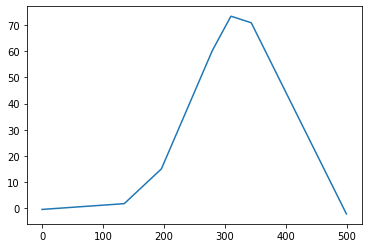

In [94]:
Z = np.linspace(0,499,500)
#Y = arr_pred[0][0] - arr_pred[0][4]
#plt.plot(Z,Y)
#plt.figure(figsize=(12,6))
plt.plot(Z, np.array(arr_pred[0][1].tolist())*100)

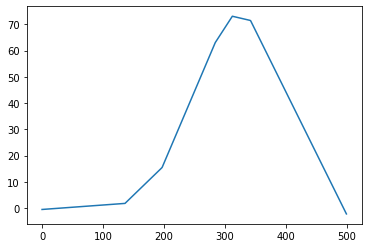

In [96]:
#Z = np.linspace(0,499,500)
plt.plot(Z, np.array(arr_pred[0][98].tolist())*100)
#plt.plot(Z, np.array(arr_pred[0][3].tolist()))
#plt.plot(Z, arr_pred[0][4].tolist())

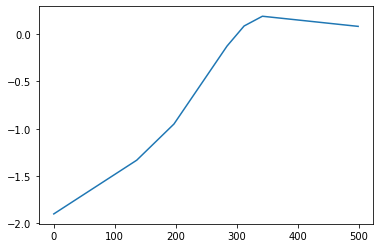

In [107]:
import random
random.seed(123)
for i in range(len(arr_pred)):
    plt.plot(Z, np.array(arr_pred[0][i].tolist()) + random.uniform(-1,1))

Text(1.0, 0, 'Loss = 0.0003')

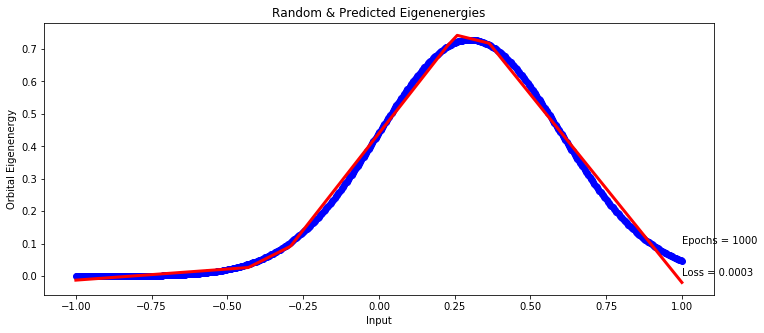

In [16]:
plt.figure(figsize=(12,5))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "blue")
plt.xlabel('Input')
plt.ylabel('Orbital Eigenenergy')
plt.title('Random & Predicted Eigenenergies')
plt.plot(x.data.numpy(), prediction.data.numpy(), 'red', lw=3)
plt.text(1.0, 0.1, 'Epochs = %d' % EPOCHS,)
plt.text(1.0, 0, 'Loss = %.4f' % loss.data.numpy())